In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("C:/Users/User/Downloads/score_Cred.csv")
df.head()

,Idade,Genero,Salário Mensal,Qtd de filhos,Pontuação de crédito_encoded
0,25,0,50000.0,0,0
1,30,1,100000.0,2,0
2,35,0,75000.0,1,0
3,40,1,125000.0,0,0
4,45,0,100000.0,3,0


# <p style="background-color:blue; color:white"># 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.</p>

In [5]:
X = df.drop('Pontuação de crédito_encoded', axis=1)
y = df['Pontuação de crédito_encoded']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
print("Tamanho de X_train:", X_train.shape)

Tamanho de X_train: (97, 4)


In [11]:
print("Tamanho de X_test:", X_test.shape)

Tamanho de X_test: (33, 4)


In [13]:
print("Tamanho de y_train:", y_train.shape)

Tamanho de y_train: (97,)


In [15]:
print("Tamanho de y_test:", y_test.shape)

Tamanho de y_test: (33,)


# <p style="background-color:blue; color:white">2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.</p>

A aplicação da árvore de decisão é um modelo de aprendizado de máquina supervisionado, geralmente utilizado para classificação ou regressão. Cada nó da árvore representa uma característica, enquanto cada folha representa um resultado ou, em alguns casos, um valor numérico para uma regressão.

Um passo importante ao treinar a árvore de decisão é abordar a seleção de variáveis para dividir os dados em grupos. O uso do índice de Gini é uma boa prática, pois é ótimo para medir a igualdade ou desigualdade de distribuição. Por exemplo, se um valor da base do nosso score varia de 0 a 1, quanto mais próximo de 1, mais desigual será a distribuição, enquanto quanto mais próximo de 0, menor a desigualdade.

Passo a passo:

1. Carregar conjunto de dados.
2. Dividir o conjunto de dados em treino e teste.
3. Criar classificações da árvore.
4. Treinar os dados de treinamento.
5. Fazer variações com teste.
6. Calcular a acurácia do modelo, utilizando métricas como Recall, Pontuação F1 e comparação com rótulos reais.

# <p style="background-color:blue; color:white">3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino..</p>

In [17]:
tree_score = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree_score.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
X_train

,Idade,Genero,Salário Mensal,Qtd de filhos
24,36,0,85000.0,2
67,33,1,52500.0,0
113,40,1,130000.0,0
89,43,1,95000.0,0
15,49,0,65000.0,1
...,...,...,...,...
71,40,1,142500.0,0
106,26,0,55000.0,1
14,44,1,75000.0,0
92,29,0,27500.0,0


In [21]:
y_train

24     0
67     2
113    0
89     0
15     0
      ..
71     0
106    2
14     0
92     1
102    0
Name: Pontuação de crédito_encoded, Length: 97, dtype: int64

In [23]:
previsto = tree_score.predict(X_test[:10])
previsto

array([2, 1, 0, 0, 0, 0, 0, 0, 2, 0], dtype=int64)

In [25]:
y_test

55     2
40     1
19     0
31     0
115    0
56     0
69     0
105    0
81     2
26     0
95     0
27     0
64     0
4      0
97     2
100    2
36     0
80     1
93     2
84     0
18     0
10     0
120    2
11     1
126    2
45     2
70     0
78     0
47     0
0      0
12     2
42     0
51     0
Name: Pontuação de crédito_encoded, dtype: int64

In [27]:
y_pred_train = tree_score.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("Acurácia:", accuracy)

Acurácia: 1.0


Noss modelo esta com um Acurácia de 1.0 isso indica 100% de precisão no conjuto de dados, assim visto na aula passada,
vamos ver os resultados depois que aplicarmos a árvore de decissão.

# <p style="background-color:blue; color:white">4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.</p>

In [29]:
previsto = tree_score.predict(X_test)
acuracia = accuracy_score(y_test, previsto)
print("Acurácia:", accuracy)

Acurácia: 1.0


In [31]:
prova_real = classification_report(y_test, previsto)
print("Prova Real de Classificação:")
print(prova_real)

Prova Real de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00         3
           2       0.90      1.00      0.95         9

    accuracy                           0.97        33
   macro avg       0.97      0.98      0.97        33
weighted avg       0.97      0.97      0.97        33





A partir dos resultados da Prova Real de Classificação, observamos que:

- A precisão (precision) é de 100% para scores altos e médios, e cerca de 90% para scores baixos.
- A revocação (recall) é de 95% para scores altos, e 100% para scores médios e baixos.
- A acurácia global do modelo é de aproximadamente 97%, indicando que as previsões estão corretas em grande parte dos casos.
- A média ponderada (weighted avg) das métricas precision, recall e f1-score é de aproximadamente 97%, demonstrando um desempenho consistente do modelo em diferentes categorias de score. 

# <p style="background-color:blue; color:white">5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?</p>

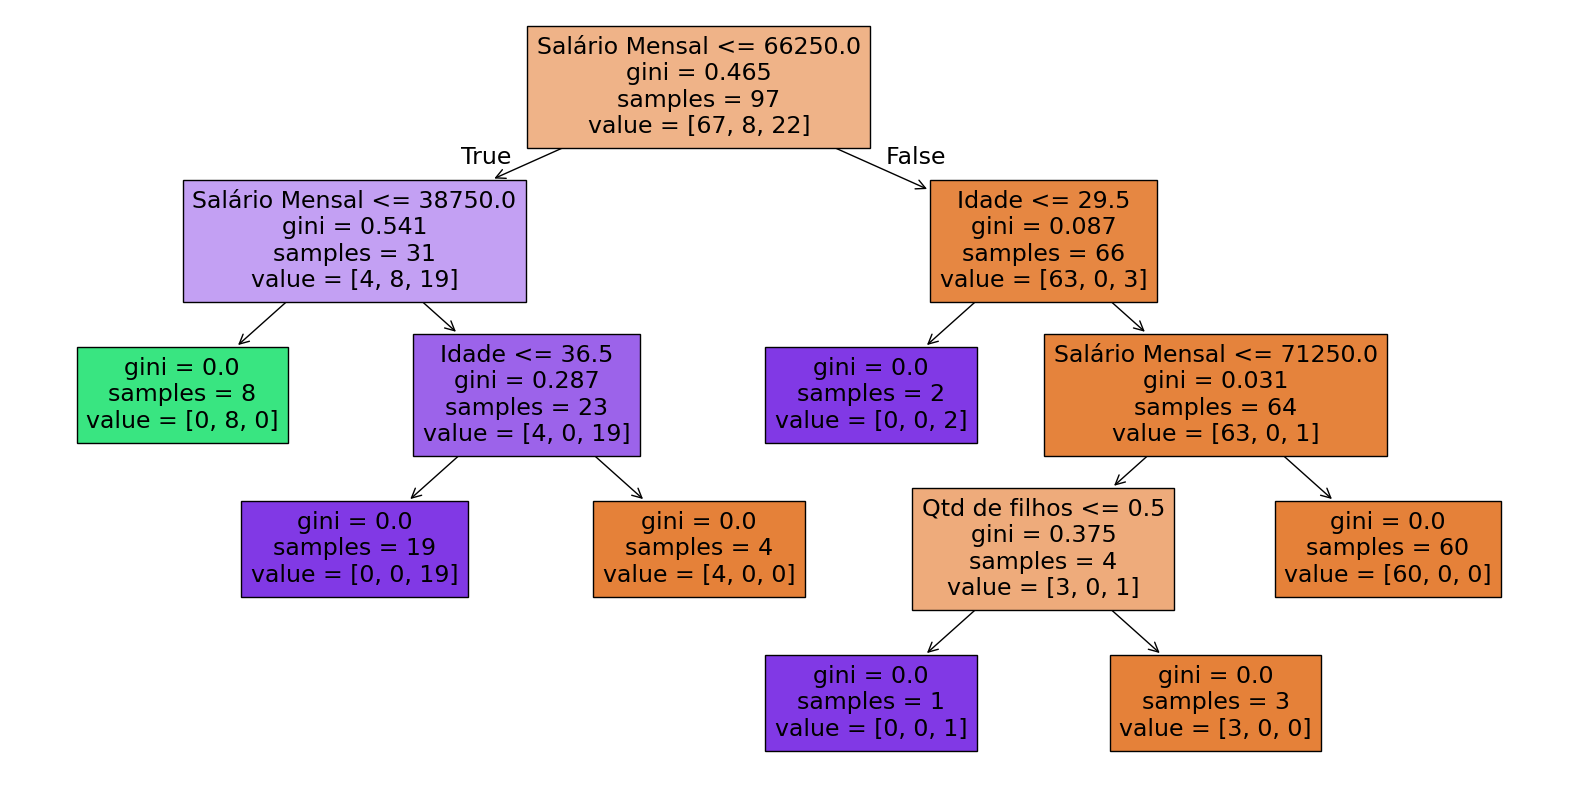

In [33]:
plt.figure(figsize=(20,10))
plot_tree(tree_score, filled=True, feature_names=X_train.columns)
plt.show()

A análise visual da árvore de decisão revela uma profundidade de 5 níveis

# <p style="background-color:blue; color:white">6) Identifique as 2 principais features do modelo.</p>

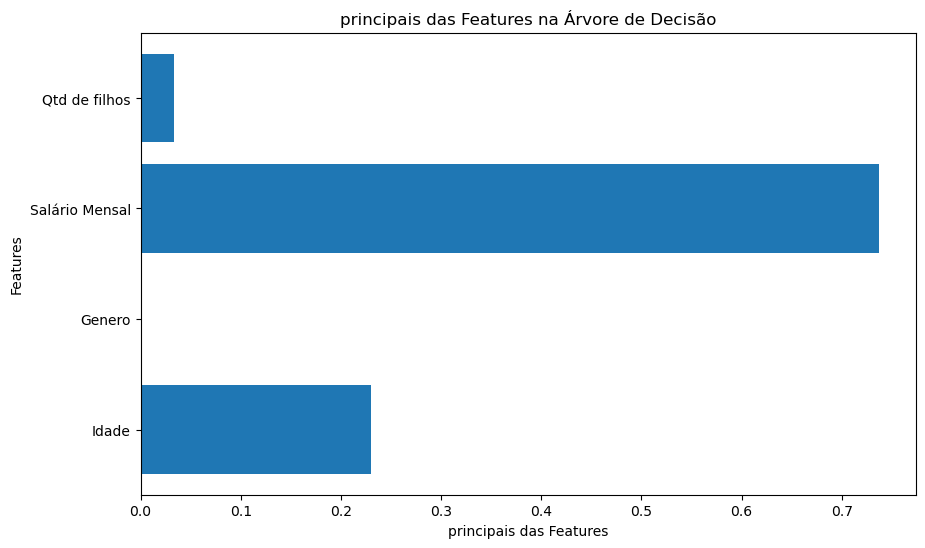

In [35]:
principais_features = tree_score.feature_importances_
nomes_features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(nomes_features, principais_features)
plt.xlabel('principais das Features')
plt.ylabel('Features')
plt.title('principais das Features na Árvore de Decisão')
plt.show()

Através da análise da árvore de decisão, identificamos que as duas principais características (features) que influenciam a previsão são o Salário Mensal e a Idade, destacando-se como os principais fatores determinantes na tomada de decisão.

# <p style="background-color:blue; color:white">7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.</p>

In [69]:
X_train_Resumido = X_train[['Salário Mensal', 'Idade']]
y_train_Resumido = y_train

In [83]:
arvore_profundidade_1 = DecisionTreeClassifier(max_depth=1, random_state=0)
arvore_profundidade_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

<function matplotlib.pyplot.show(close=None, block=None)>

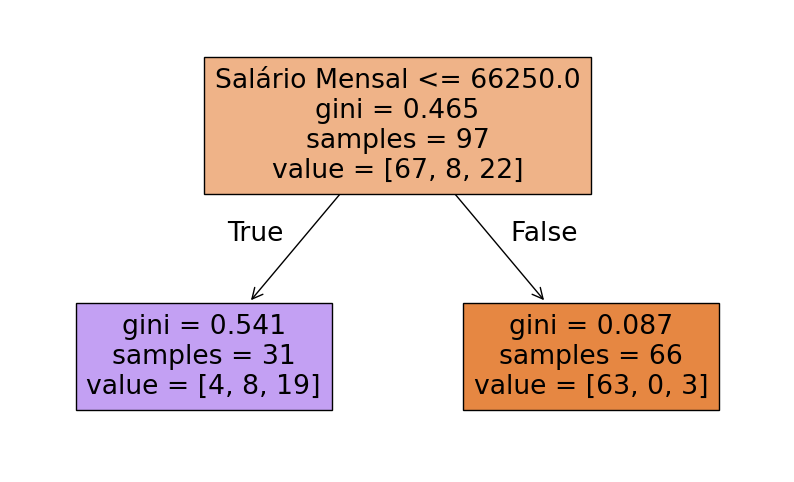

In [85]:
plt.figure(figsize=(10, 6))
plot_tree(arvore_profundidade_1, filled=True, feature_names=X_train.columns)
plt.show

Considerando apenas a característica 'Salário Mensal' na árvore de decisão, observa-se que essa variável é a mais relevante para determinar o score dos clientes. O valor [4, 8, 19] indica a distribuição dos clientes em três categorias de score: 4 clientes com score baixo (não aprovados), 8 clientes com score médio (em análise) e 19 clientes com score alto (aprovados), sugerindo que o salário mensal é um fator importante para a aprovação dos clientes.


# <p style="background-color:blue; color:white">8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.</p>

Após comparar os resultados do modelo Naive Bayes com os da nossa árvore de decisão, observamos que a árvore de decisão apresentou um desempenho ligeiramente superior, com uma acurácia de 97% em comparação com os 96% do Naive Bayes. Além disso, a árvore de decisão também apresentou um recall mais consistente, com 95% para scores altos, 100% para scores baixos e 100% para scores médios, demonstrando uma maior capacidade de adaptação e generalização em comparação com o modelo Naive Bayes